<font color=#1E8449>☘ </font> 注意事項
1. 如果您使用 Colab，在您熟悉 Colab 的操作環境之後，建議把介面改成英文版，以便讓程式碼有最好的顯示效果
 * 選擇 Colab 功能表裡的 <font color=#E59866>說明</font> - <font color=#E59866>查看英文版本</font> 即可將介面改成英文版
 * 要改回中文版，請關掉目前開啟的 Colab 網頁，再重新開啟您執行的 Colab 檔案即可（Colab 預設為中文版）
2. 建議選擇暗色背景，長時間撰寫程式時眼睛會比較舒服
 * 在 Colab 裡選擇 <font color=#E59866>Tools（工具）</font> - <font color=#E59866> Settings （設定）</font> - <font color=#E59866> Site（網站）</font> - <font color=#E59866> Theme （主題）</font> - <font color=#E59866> Dark </font>
 * 在 Jupyter lab 中選擇 <font color=#E59866> Settings </font> - <font color=#E59866> JupyterLab theme </font> - <font color=#E59866> JupyerterLab Dark </font>



## Chap14  使用 Skimage 進行圖像處理

<font color=#1EA004>☘ </font> Skimage 的線上文件: https://scikit-image.org/docs/dev/api/skimage.html

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
from skimage import data, io

In [ ]:
# 檢查 skimage 的版本
skimage.__version__

'0.18.3'

<font color=#1EA004>☘ </font>下圖是 Skimage 提供的範例圖檔


image.png

### 14.1 圖像的基本概念

#### 14.1.1 灰階圖像

In [ ]:
man=data.camera()

In [ ]:
type(man)

numpy.ndarray

In [ ]:
man.dtype

dtype('uint8')

In [ ]:
man.shape

(512, 512)

In [ ]:
man[:4,:3]

array([[200, 200, 200],
       [200, 199, 199],
       [199, 199, 199],
       [200, 200, 199]], dtype=uint8)

In [ ]:
plt.imshow(man,cmap='gray')
plt.show()

In [ ]:
io.imshow(man)
io.show()

In [ ]:
io.imshow(man/255)
io.show()

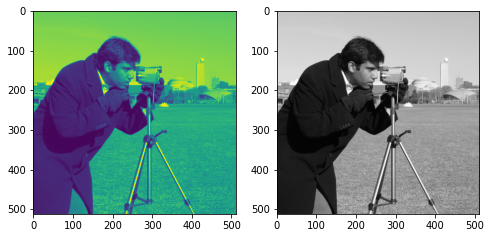

In [ ]:
# 預設色表與指定色表
fig,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].imshow(man)   # 不指定色表
ax[1].imshow(man,cmap='gray')   # 指定色表
plt.show()

In [ ]:
bins = np.arange(-0.5, 255+1,1)
plt.hist(man.flatten(), bins = bins)
plt.show()

In [ ]:
from skimage.exposure import histogram

In [ ]:
freq, bin = histogram(man)
plt.plot(bin, freq, lw=2)
plt.show()

In [ ]:
# vmin和vmax對於圖像顯示的影響
v=np.array([[-100,300],[0,120],[120,180]])
fig,ax=plt.subplots(1,3,figsize=(11,3))
for i in range(3):
    im=ax[i].imshow(man,cmap='gray',vmin=v[i,0],vmax=v[i,1])
    plt.colorbar(im,ax=ax[i])  # 在圖像右邊顯示色條
    ax[i].set_xticks([])  # 不顯示 x 軸的刻度
    ax[i].set_yticks([])  # 不顯示 y 軸的刻度
fig.tight_layout()
plt.show()

#### 14.1.2 彩色圖像

In [ ]:
cofe=data.coffee()

In [ ]:
cofe.shape

(400, 600, 3)

In [ ]:
cofe.dtype

dtype('uint8')

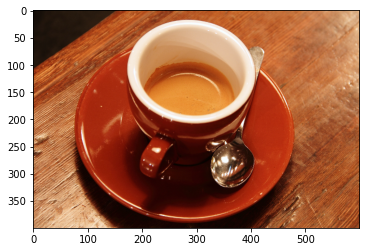

In [ ]:
plt.imshow(cofe)
plt.show()

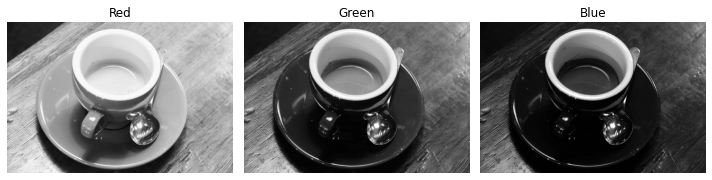

In [ ]:
# 繪製紅、綠、藍三個通道的圖像
title=['Red','Green','Blue']
fig,ax=plt.subplots(1,3,figsize=(10,4))
for i in range(3):
   ax[i].imshow(cofe[:,:,i],cmap='gray')   # 提取不同的通道
   ax[i].set_title(title[i])
   ax[i].axis('off')
fig.tight_layout()

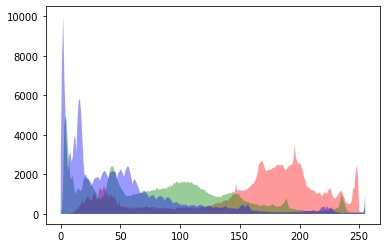

In [ ]:
# 彩色圖像的直方圖
fig, ax = plt.subplots()
my_color=['r','g','b']
for i in range(3):
    hist, bin = histogram(cofe[:,:,i])
    ax.fill_between(bin, hist, facecolor=my_color[i],alpha=0.4)

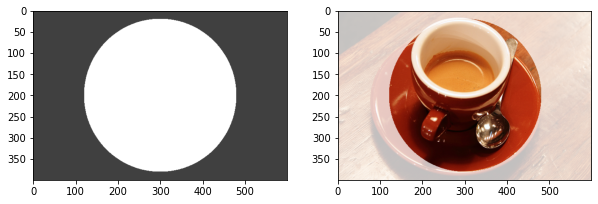

In [ ]:
# 建立透明遮罩
mask=np.zeros(cofe.shape[0:2],dtype='uint8')+64
for r in range(mask.shape[0]):
    for c in range(mask.shape[1]):
        if (r-200)**2+(c-300)**2<180**2:
            mask[r,c]=255

# 建立有透明遮罩的彩色圖像
cofe_mask=np.concatenate((cofe,mask[:,:,None]),axis=2)
fig,ax=plt.subplots(1,2,figsize=(10,6))  # 展示圖形
ax[0].imshow(mask,cmap='gray',vmin=0,vmax=255)
ax[1].imshow(cofe_mask)
plt.show()

#### 14.1.3 儲存與讀取圖像檔

In [ ]:
# 將陣列保存為圖檔
cofe=data.coffee()
io.imsave('cofe95.jpg',cofe,quality=95)   # 品質 95% 
io.imsave('cofe10.jpg',cofe,quality=10)   # 品質 10% 

In [ ]:
# 從磁碟讀取檔案
cofe95=io.imread('cofe95.jpg')
cofe10=io.imread('cofe10.jpg')

fig,ax=plt.subplots(1,2,figsize=(10,4))
for i,img in [(0,cofe95),(1,cofe10)]:
    ax[i].imshow(img)
    ax[i].axis('off')
fig.tight_layout()
plt.show()

In [ ]:
#!ls -l my_cat0.jpg  # for colab 

In [ ]:
# !dir my_cat0.jpg    # for jupyter lab installed in windows

### 14.2 認識色表

<font color=#1EA004>☘ </font>  在 Matplotlib 中，𝑛 個顏色的色表是由一個 𝑛×𝑛×4 的陣列所描述
1. 陣列的每一橫列代表一個顏色
2. 前 3 個元素是紅綠藍 3 個顏色的強度值
3. 最後一個元素是透明度

In [ ]:
from matplotlib.colors import ListedColormap

In [ ]:
palette=np.array([[1, 0, 0],
                  [0, 1, 0],
                  [0, 0, 1],
                  [0, 0, 0],
                  [1, 1, 1]])

In [ ]:
newcmp = ListedColormap(palette)

In [ ]:
type(newcmp)

matplotlib.colors.ListedColormap

In [ ]:
img=np.array([[9,7,3],
              [4,0,9],
              [3,4,0]])

In [ ]:
plt.imshow(img,cmap=newcmp)   
plt.colorbar()
plt.show()

In [ ]:
img=np.array([[0.9,0.6,0.4],
              [0.5,0.1,0.7],
              [0.2,0.8,0.5]])

In [ ]:
plt.imshow(img,cmap=newcmp,vmin=0.2,vmax=0.8)   
plt.colorbar()
plt.show()

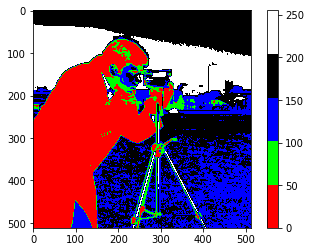

In [ ]:
man=data.camera()
plt.imshow(man,cmap=newcmp)
plt.colorbar()
plt.show()

### 14.3 基礎圖像處理

#### 14.3.1 圖像的切割

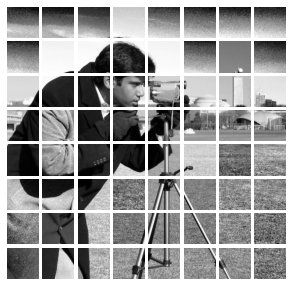

In [ ]:
# 灰階圖像的切割
man=data.camera()
manP=man.reshape(8,64,8,64).swapaxes(1,2)
fig,ax=plt.subplots(8,8,figsize=(5,5))
for r in range(8):
    for c in range(8):
        ax[r,c].imshow(manP[r,c],cmap='gray')
        ax[r,c].axis('off')
fig.subplots_adjust(wspace=0.1)  # 調整每個子圖的水平間距為子圖寬的0.1
fig.subplots_adjust(hspace=0.1)  # 調整每個子圖的垂直間距為子圖高的0.1

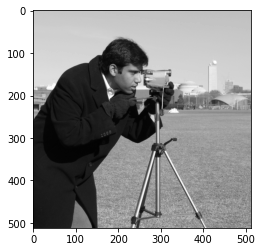

In [ ]:
# 圖像的合併
manR=manP.swapaxes(1,2).reshape(512,512)
plt.imshow(manR,cmap='gray')
plt.show()

#### 14.3.2 像素的操作 

<font color=#1EA004>☘ </font>for grayscale image

In [ ]:
arr=np.array([240,250,255],dtype='uint8')

In [ ]:
arr+10   # 溢位發生

array([250,   4,   9], dtype=uint8)

In [ ]:
arr2=arr.astype(int)+10
arr2[arr2>255]=255
arr2

array([250, 255, 255])

In [ ]:
np.clip(arr.astype(int)+10,0,255)

array([250, 255, 255])

In [ ]:
# 像素的溢位
coins=data.coins()
coins0=coins.copy()
coins0[:,190:]+=60  # 會有溢位發生

coins1=coins.copy().astype(int)   
coins1[:,190:]+=60
coins1[coins1>255]=255

fig,ax=plt.subplots(1,2,figsize=(10,6))
ax[0].imshow(coins0,cmap='gray')
ax[1].imshow(coins1,cmap='gray')
plt.show()


In [ ]:
# 彩色圖像的裁切與像素值的設定
astr0=data.astronaut()
astr1=astr0[0:256,100:360,:]   # 圖像裁切
astr2=astr0.copy()
astr2[10:80,20:90,:]=[0,255,0]        	# 填上綠色
astr2[350:400,50:200,:]=[255,255,0]   	# 填上黃色
astr2[200:300,400:500,:]=[255,0,0]    	# 填上紅色

fig,ax=plt.subplots(1,3,figsize=(12,6))
ax[0].imshow(astr0)
ax[1].imshow(astr1)
ax[2].imshow(astr2)
plt.show()

#### 14.3.3 圖像資料型別的轉換函數

In [ ]:
imgF=np.array([[0.00,0.12,0.65],
               [0.76,0.20,1.00]])

In [ ]:
imgU=skimage.img_as_ubyte(imgF) 
imgU

array([[  0,  31, 166],
       [194,  51, 255]], dtype=uint8)

In [ ]:
(imgF*255).astype('uint8')  # Some errors

array([[  0,  30, 165],
       [193,  51, 255]], dtype=uint8)

In [ ]:
(imgF*255).round().astype('uint8')  # Correct

array([[  0,  31, 166],
       [194,  51, 255]], dtype=uint8)

In [ ]:
skimage.img_as_bool(imgF)  

array([[False, False,  True],
       [ True, False,  True]])

In [ ]:
imgF>0.5

array([[False, False,  True],
       [ True, False,  True]])

In [ ]:
skimage.img_as_float(imgU)

array([[0.        , 0.12156863, 0.65098039],
       [0.76078431, 0.2       , 1.        ]])

In [ ]:
imgU/255

array([[0.        , 0.12156863, 0.65098039],
       [0.76078431, 0.2       , 1.        ]])

In [ ]:
# 將 man 轉成二值圖像來顯示
man=data.camera()  
plt.imshow(skimage.img_as_bool(man),
           cmap='gray')
plt.show()

#### 14.3.4 色彩空間的轉換

In [ ]:
from skimage import color

In [ ]:
cat=data.chelsea()

In [ ]:
cat.shape

(300, 451, 3)

In [ ]:
# 彩色圖像轉換成灰階圖像
fig,ax=plt.subplots(1,2)
ax[0].imshow(cat)
ax[1].imshow(color.rgb2gray(cat),cmap='gray')  # 將RGB圖像轉成灰階
ax[0].axis('off')
ax[1].axis('off')
fig.tight_layout()
io.show()

In [ ]:
cat_hsv=color.rgb2hsv(cat)

In [ ]:
cat_hsv.shape

(300, 451, 3)

In [ ]:
cat_hsv.dtype   

dtype('float64')

In [ ]:
cat_hsv.max(), cat_hsv.min()

(1.0, 0.0)

In [ ]:
# 顯示HSV的三個通道
fig,ax=plt.subplots(1,3,figsize=(10,4))
for i in range(3):
    ax[i].imshow(cat_hsv[:,:,i],cmap='gray')
    ax[i].axis('off')
fig.tight_layout()

In [ ]:
lab = color.rgb2lab(cat)   # 轉 lab

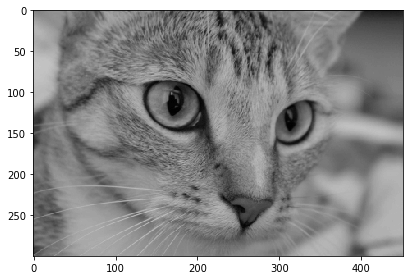

In [ ]:
io.imshow(lab[:,:,0].astype('uint8'),
          vmin=0,
          vmax=100,
          cmap='gray') 

In [ ]:
rgb=color.lab2rgb(lab)

In [ ]:
io.imshow(rgb) # for exercise
plt.show()

### 14.4 進階影像處理

#### 14.4.1 改變大小與旋轉

In [ ]:
from skimage import transform

In [ ]:
cat=data.chelsea()

In [ ]:
# skimage 0.19 以後的版本請將 multichannel=True 改成 channel_axis=2
cat_d=transform.rescale(cat,
                        scale=0.125,
                        multichannel=True)

In [ ]:
# 檢查 skimage 的版本
# skimage.__version__

In [ ]:
cat_d.shape

(38, 56, 3)

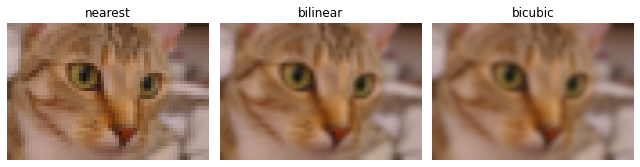

In [ ]:
# 指定顯示圖形時採用的內插法
methods = ['nearest', 'bilinear', 'bicubic']
fig, ax = plt.subplots(1, 3,figsize=(9, 6))
for i in range(3):
    ax[i].imshow(cat_d, interpolation=methods[i])
    ax[i].set_title(methods[i])
    ax[i].axis('off')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:178: UserWarning: Bi-quadratic interpolation behavior has changed due to a bug in the implementation of scikit-image. The new version now serves as a wrapper around SciPy's interpolation functions, which itself is not verified to be a correct implementation. Until skimage's implementation is fixed, we recommend to use bi-linear or bi-cubic interpolation instead.
  preserve_range=preserve_range)


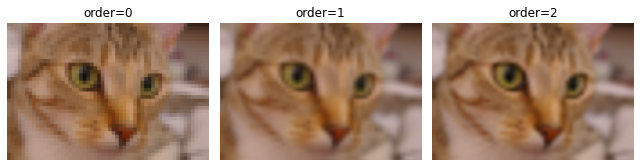

In [ ]:
# 圖像放大時，指定內插函數的次方數
fig, ax = plt.subplots(1, 3,figsize=(9, 6))
for i in range(3):
    # skimage 0.19 以後的版本請將 multichannel=True 改成 channel_axis=2
    cat_u=transform.rescale(cat_d,scale=8,order=i,multichannel=True)  
     
    ax[i].imshow(cat_u)
    ax[i].set_title(f'order={i}')
    ax[i].axis('off')
plt.tight_layout()

In [ ]:
cat_resize=transform.resize(cat,(80,120))    

In [ ]:
cat_resize.shape

(80, 120, 3)

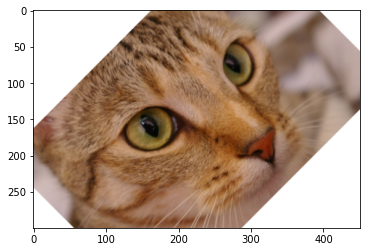

In [ ]:
cat_rot=transform.rotate(cat,45,cval=1)   
plt.imshow(cat_rot)
plt.show()

#### 14.4.2 邊緣偵測

In [ ]:
# 邊緣偵測
from skimage.feature import canny
coins=data.coins()
fig, axes = plt.subplots(1, 3, figsize=(9, 4))
for i in range(3):
    axes[i].imshow(canny(coins,sigma=i), cmap='gray')
    axes[i].set_title(f'sigma={i}')
    axes[i].axis('off')
fig.tight_layout()

#### 14.4.3 柔化與銳利化影像

In [ ]:
# 柔化與銳利化圖像
from skimage.filters import unsharp_mask, gaussian
cat=data.chelsea()
fig,ax=plt.subplots(1,3,figsize=(10,4))
# skimage 0.19 以後的版本請將 multichannel=True 改成 channel_axis=2
ax[0].imshow(gaussian(cat, sigma=3, multichannel=True))   # 柔化
ax[1].imshow(cat)
ax[2].imshow(unsharp_mask(cat, amount=5, multichannel=True)) # 銳利化
for i in range(3):
    ax[i].axis('off')
fig.tight_layout()

#### 14.4.4 去雜訊處理

In [ ]:
man = data.camera()

In [ ]:
noise=np.random.rand(*man.shape)

In [ ]:
man[noise>0.98]=255

In [ ]:
man[noise<0.02]=0

In [ ]:
# 利用 median() 函數進行去除雜訊
from skimage.filters.rank import median
from skimage.morphology import disk

fig,ax=plt.subplots(1,3,figsize=(10,4))
ax[0].imshow(man,cmap='gray')   # 帶有雜訊的圖像
ax[1].imshow(median(man, disk(1)),cmap='gray')    # 濾除雜訊
ax[2].imshow(median(man, disk(10)),cmap='gray')   # 濾除雜訊
for i in range(3):
    ax[i].axis('off')
fig.tight_layout()

In [ ]:
disk(2)

array([[0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

### 14.5 圖像修復 image inpaiting

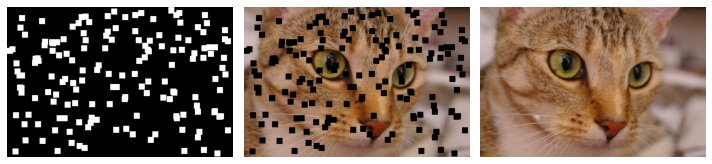

In [ ]:
# 圖像修復的範例
from skimage.restoration import inpaint

# 建立遮罩 
cat=data.chelsea()
np.random.seed(2022)
mask=np.zeros(cat.shape[0:2]).astype(bool)
size=12
for _ in range(160):
    x=np.random.randint(0,cat.shape[0]-size)
    y=np.random.randint(0,cat.shape[1]-size)
    mask[x:x+size,y:y+size]=True

# 生成遭破壞的圖像
cat_damage=cat* ~mask[:,:,np.newaxis]

# 圖像修復
# skimage 0.19 以後的版本請將 multichannel=True 改成 channel_axis=2
out=inpaint.inpaint_biharmonic(cat_damage,mask,multichannel=True)

# 顯示圖像
fig,ax=plt.subplots(1,3,figsize=(10,4))
ax[0].imshow(mask,cmap='gray')
ax[1].imshow(cat_damage)
ax[2].imshow(out)
for i in range(3):
    ax[i].axis('off')
fig.tight_layout()